[Dopravci na Vánoce napálili ceny. Vlak do Drážďan stojí tisíce](https://www.novinky.cz/clanek/ekonomika-dopravci-na-vanoce-napalili-ceny-vlak-do-drazdan-stoji-tisice-40501317), píší na Novinkách. Ono to ale je, jako obvykle, složitější.

In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet('data/jizdenky.parquet')

In [4]:
df = df[df['kam'].str.contains('Dresd',na=False)]

In [5]:
df_prvni = df.drop_duplicates(subset=['odjezd'], keep='first')

In [6]:
df_posledni = df.drop_duplicates(subset=['odjezd'], keep='last')

In [37]:
dokdy = "2025-02-08"

In [7]:
df_posledni.sample()

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,...,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium
1394408,2024-12-25 07:08:51,ČD,Ústí n.L.hl.n.,Dresden Hbf,2025-03-12 12:17:00,77 days 05:08:09,77,1853.135833,753.0,vlak,...,None,st,2,"[R 690 Labe, Os 5447, S 31738]",None,None,NaN,NaN,NaN,NaN


## Teze: „Jízdné kolem svátků je totiž až více než dvojnásobně dražší než v jiné termíny.“

### Ceny jízdenek na spoje zachycené při scrapování poprvé (= dlouho před odjezdem):

Maximální:

<Axes: xlabel='odjezd'>

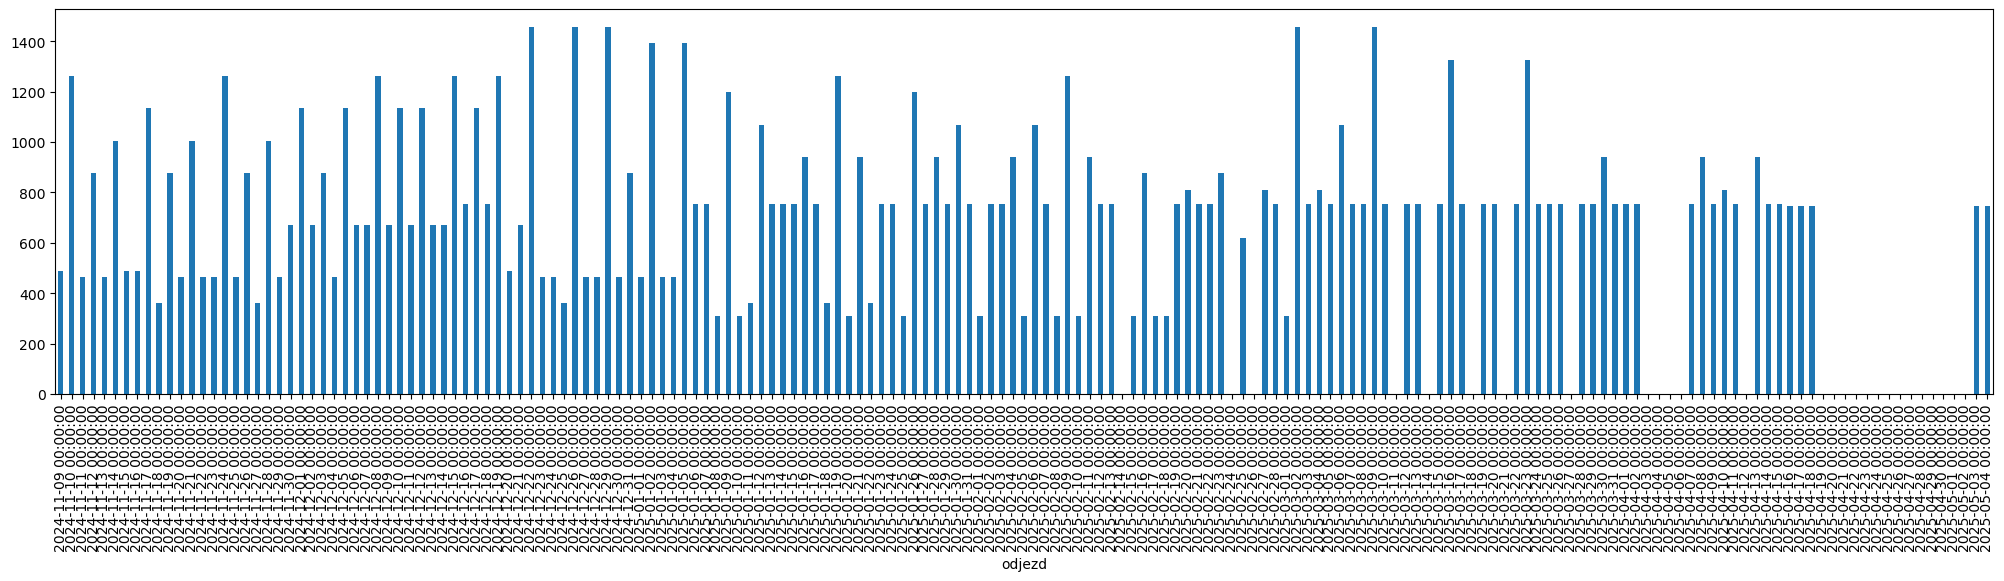

In [11]:
df_prvni.groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].max().plot.bar(figsize=(25,5))

Mediánová:

<Axes: xlabel='odjezd'>

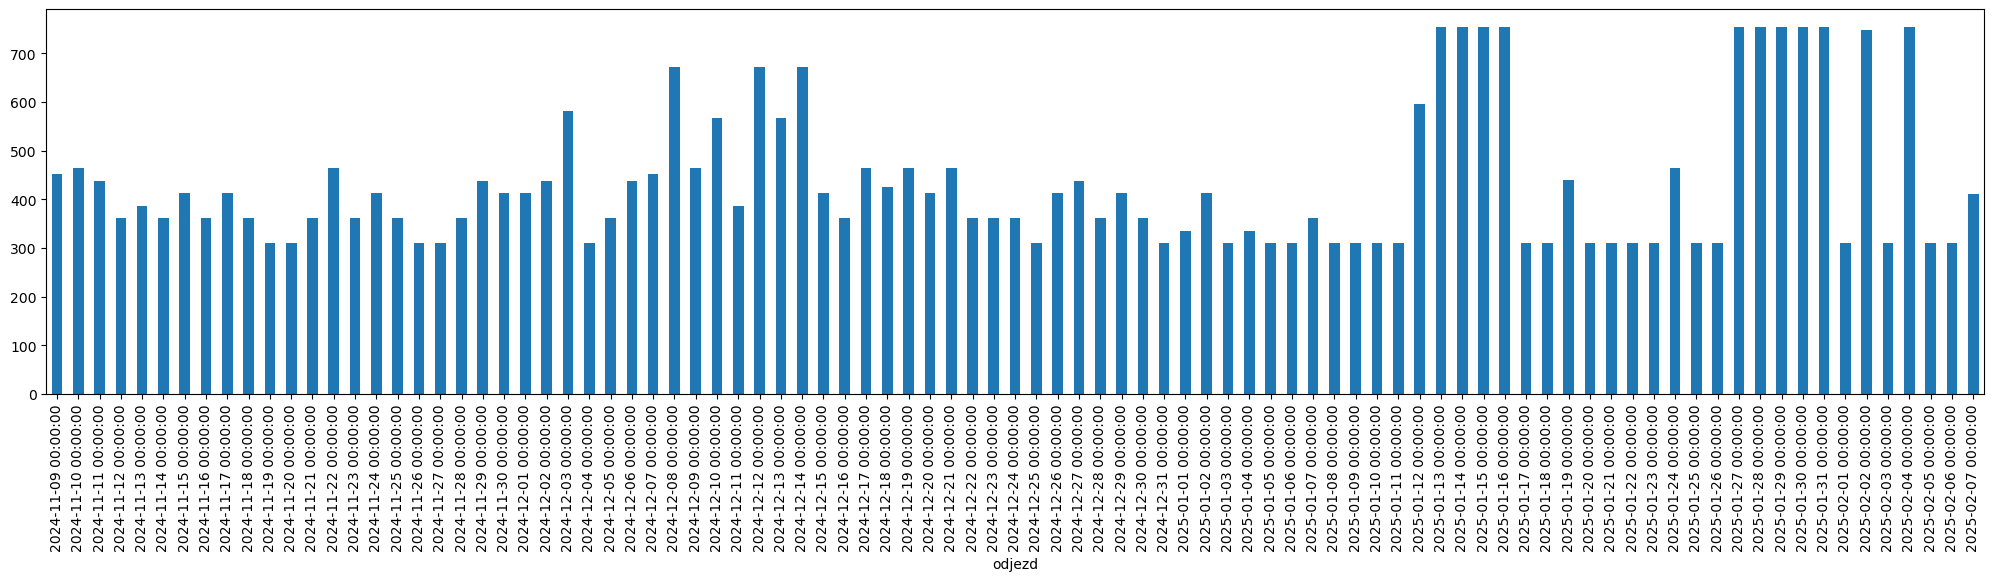

In [39]:
df_prvni[df_prvni['odjezd'] <= dokdy].groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].median().plot.bar(figsize=(25,5))

### Ceny jízdenek na spoje zachycené při scrapování naposled (= krátce před odjezdem):

Mediánová:

<Axes: xlabel='odjezd'>

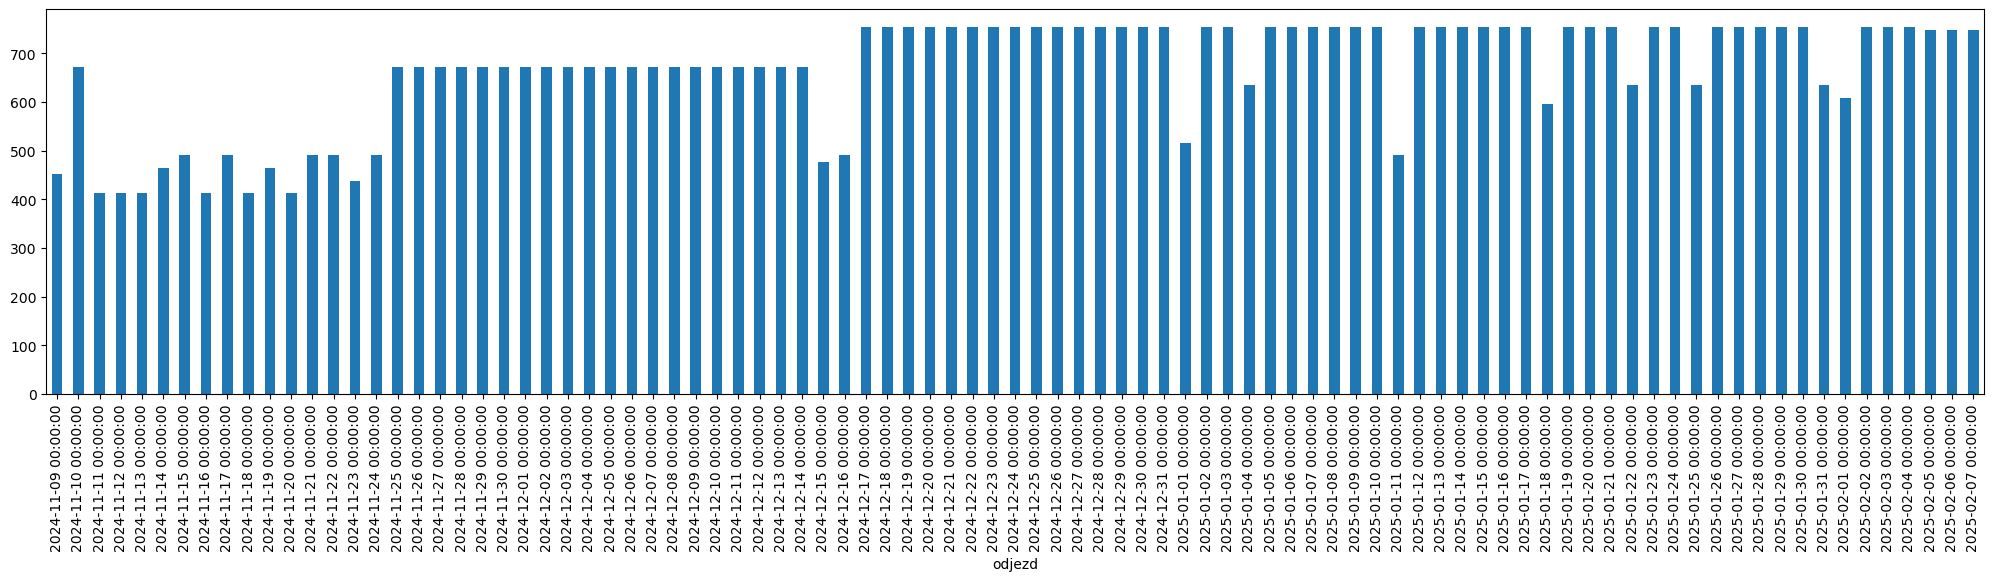

In [41]:
df_posledni[df_posledni['odjezd'] <= dokdy].groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='odjezd'>

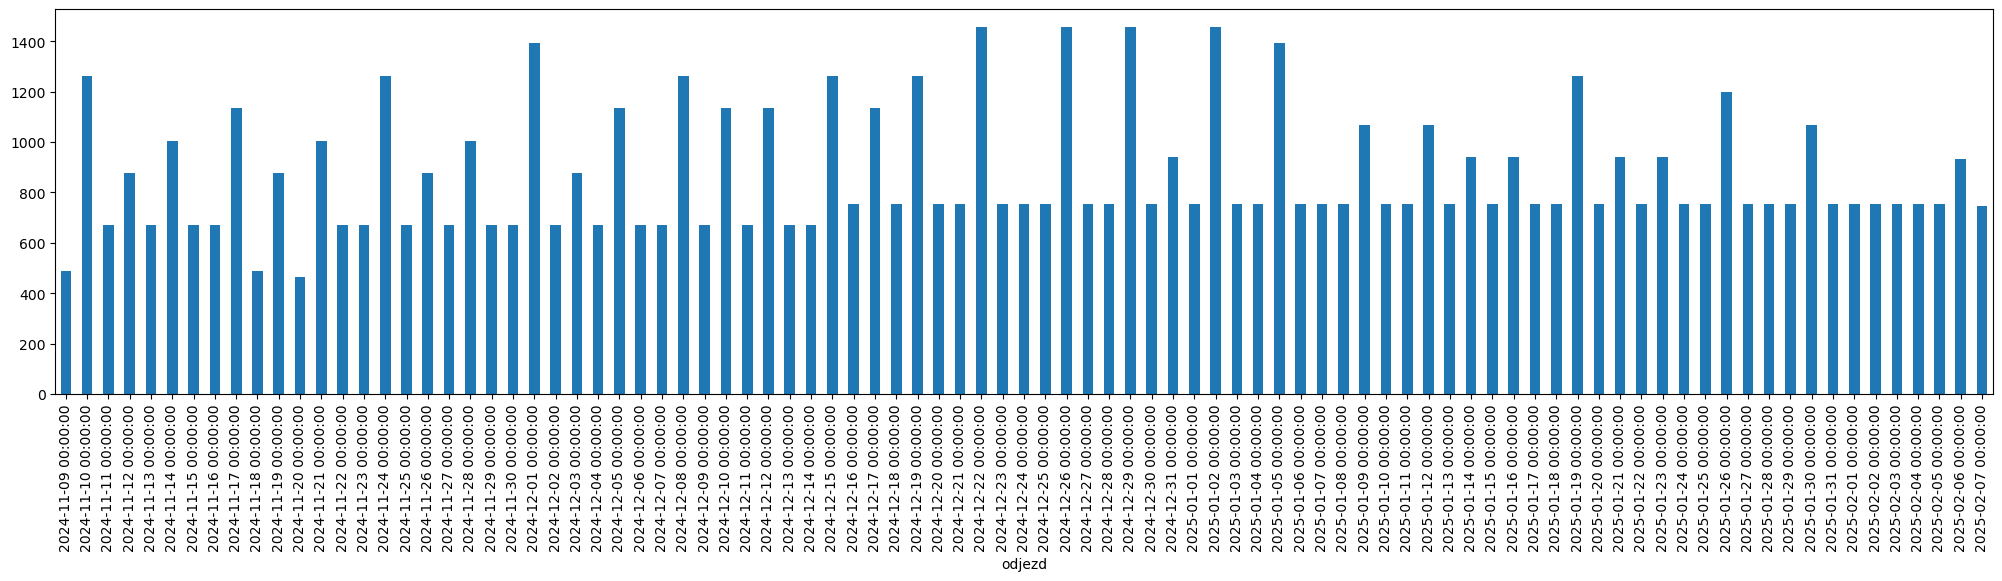

In [43]:
df_posledni[df_posledni['odjezd'] <= dokdy].groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].max().plot.bar(figsize=(25,5))

Ceny při nákupu 2-3 dny dopředu:

<Axes: xlabel='odjezd'>

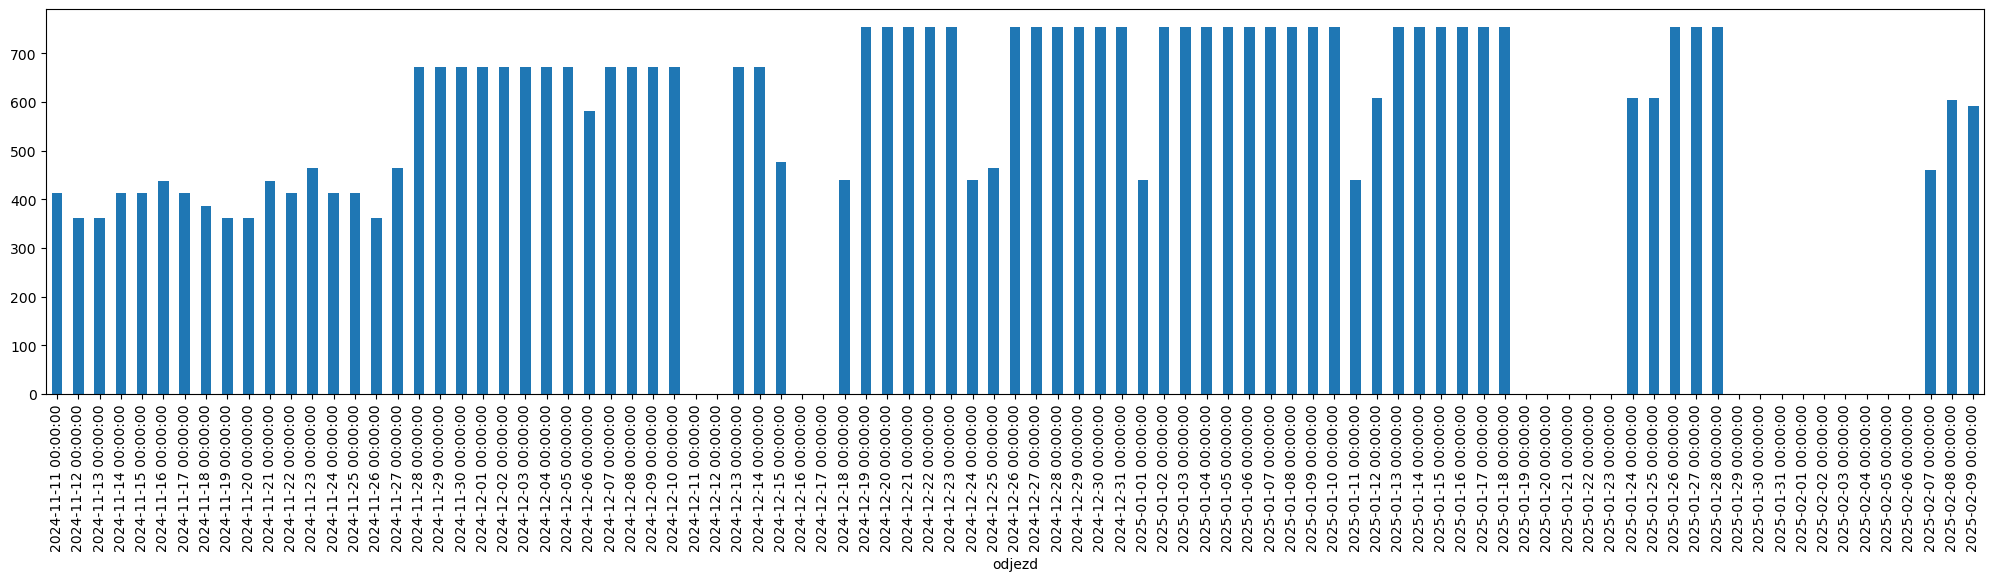

In [45]:
df[df['predstih_d'].isin([2,3])].groupby(pd.Grouper(key='odjezd', freq='D'))['cena'].median().plot.bar(figsize=(25,5))

In [20]:
df_posledni.groupby('odjezd')['cena'].min().nlargest(30)

odjezd
2024-12-22 18:58:00    1455.0
2024-12-26 18:58:00    1455.0
2024-12-29 18:58:00    1455.0
2025-01-02 18:58:00    1455.0
2025-03-02 18:58:00    1455.0
2025-03-09 18:58:00    1455.0
2025-03-23 18:58:00    1455.0
2024-12-01 19:21:00    1393.0
2024-12-22 19:16:00    1393.0
2024-12-29 19:16:00    1393.0
2025-01-02 19:16:00    1393.0
2025-01-05 19:16:00    1393.0
2025-01-05 18:58:00    1326.0
2025-03-16 18:58:00    1326.0
2024-11-10 19:21:00    1264.0
2024-11-24 19:21:00    1264.0
2024-12-08 19:21:00    1264.0
2024-12-15 19:16:00    1264.0
2024-12-19 19:16:00    1264.0
2024-12-26 19:16:00    1264.0
2025-01-19 19:16:00    1264.0
2025-02-09 19:16:00    1264.0
2025-01-26 18:58:00    1197.0
2025-02-09 18:58:00    1188.0
2024-11-17 19:21:00    1135.0
2024-12-05 19:21:00    1135.0
2024-12-10 19:21:00    1135.0
2024-12-12 19:21:00    1135.0
2024-12-17 19:16:00    1135.0
2025-01-09 18:58:00    1068.0
Name: cena, dtype: float64

In [21]:
df_posledni.groupby('odjezd')['cena'].max().nlargest(30)

odjezd
2024-12-22 18:58:00    1455.0
2024-12-26 18:58:00    1455.0
2024-12-29 18:58:00    1455.0
2025-01-02 18:58:00    1455.0
2025-03-02 18:58:00    1455.0
2025-03-09 18:58:00    1455.0
2025-03-23 18:58:00    1455.0
2024-12-01 19:21:00    1393.0
2024-12-22 19:16:00    1393.0
2024-12-29 19:16:00    1393.0
2025-01-02 19:16:00    1393.0
2025-01-05 19:16:00    1393.0
2025-01-05 18:58:00    1326.0
2025-03-16 18:58:00    1326.0
2024-11-10 19:21:00    1264.0
2024-11-24 19:21:00    1264.0
2024-12-08 19:21:00    1264.0
2024-12-15 19:16:00    1264.0
2024-12-19 19:16:00    1264.0
2024-12-26 19:16:00    1264.0
2025-01-19 19:16:00    1264.0
2025-02-09 19:16:00    1264.0
2025-01-26 18:58:00    1197.0
2025-02-09 18:58:00    1188.0
2024-11-17 19:21:00    1135.0
2024-12-05 19:21:00    1135.0
2024-12-10 19:21:00    1135.0
2024-12-12 19:21:00    1135.0
2024-12-17 19:16:00    1135.0
2025-01-09 18:58:00    1068.0
Name: cena, dtype: float64